In [ ]:
import yfinance as yf

# Download historical data for INFY.NS
data = yf.download("CAP.PA", period="max")

# Save data to a CSV file
data.to_csv("CAP.PA_historical_data.csv")

[*********************100%***********************]  1 of 1 completed


In [ ]:
!pip install arch

#Step 1: Load and Clean the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, jarque_bera, kstest, norm
from statsmodels.tsa.stattools import adfuller
from arch import arch_model # This line should work now
from scipy.stats import normaltest
from math import log, sqrt, exp
from scipy.stats import norm


In [ ]:
import pandas as pd

# Load the dataset and parse the date column
data = pd.read_csv("/content/CAP.PA_historical_data.csv")

# # Rename columns for better understanding
# data.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Display the first few rows
data.head()


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,CAP.PA,CAP.PA,CAP.PA,CAP.PA,CAP.PA,CAP.PA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-03 00:00:00+00:00,155.20037841796875,255.89999389648438,274.79998779296875,255.89999389648438,258.20001220703125,492603
3,2000-01-04 00:00:00+00:00,143.85906982421875,237.1999969482422,257.0,236.60000610351562,257.0,357912
4,2000-01-05 00:00:00+00:00,129.66726684570312,213.8000030517578,230.0,212.0,229.10000610351562,784213


In [ ]:
data = data.iloc[2:, [0,2]]
data.reset_index(drop=True, inplace=True)
data = data.rename(columns={'Price': 'Date'})
data.head()

,Date,Close
0,2000-01-03 00:00:00+00:00,255.89999389648438
1,2000-01-04 00:00:00+00:00,237.1999969482422
2,2000-01-05 00:00:00+00:00,213.8000030517578
3,2000-01-06 00:00:00+00:00,215.1999969482422
4,2000-01-07 00:00:00+00:00,226.0


In [ ]:
data.isnull().sum()

,0
Date,0
Close,0


In [ ]:
data["Date"] = pd.to_datetime(data["Date"]).dt.date
data["Date"] = pd.to_datetime(data["Date"])
data["Close"] = data["Close"].astype(float)
data.head()

,Date,Close
0,2000-01-03,255.899994
1,2000-01-04,237.199997
2,2000-01-05,213.800003
3,2000-01-06,215.199997
4,2000-01-07,226.000000


#Step 2: Plot Prices

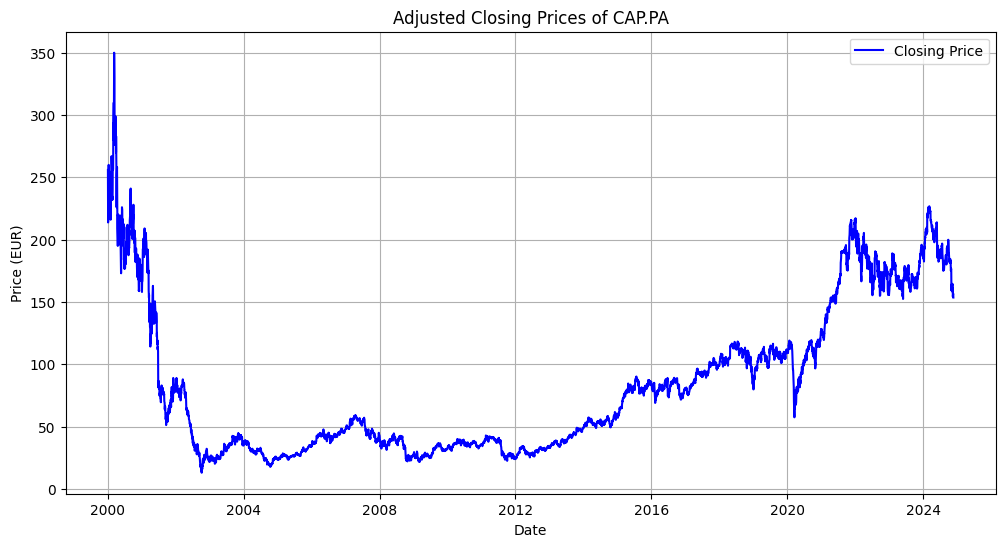

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('Adjusted Closing Prices of CAP.PA')
plt.xlabel('Date')
plt.ylabel('Price (EUR)')
plt.legend()
plt.grid()
plt.show()



#Step 3: Calculate and Plot Log-Returns

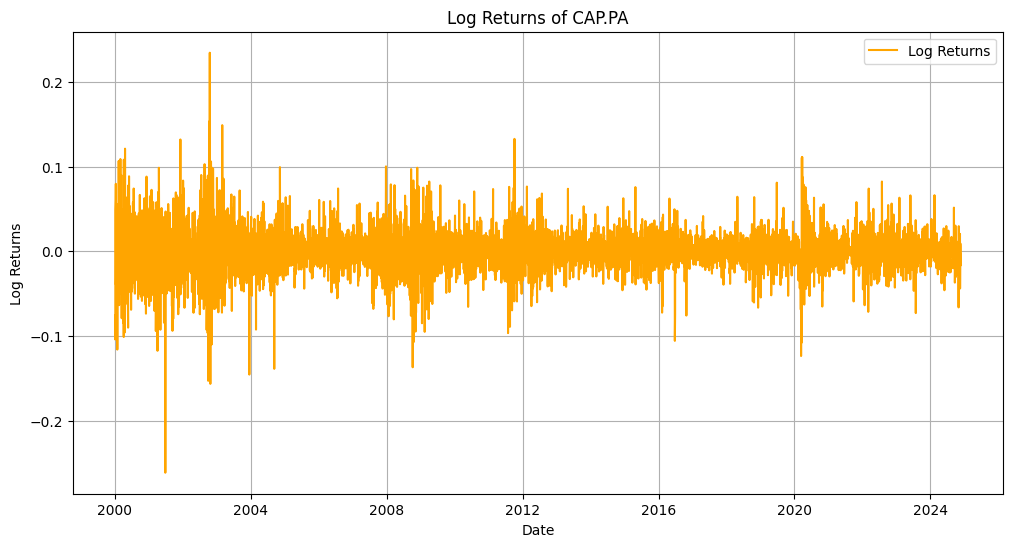

In [ ]:
data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))

plt.figure(figsize=(12, 6))
plt.plot(data['Date'][1:], data['Log Returns'][1:], label='Log Returns', color='orange')
plt.title('Log Returns of CAP.PA')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid()
plt.show()

#Step 4: Test for Normality (QQ Plot, Histogram, Statistical Tests)


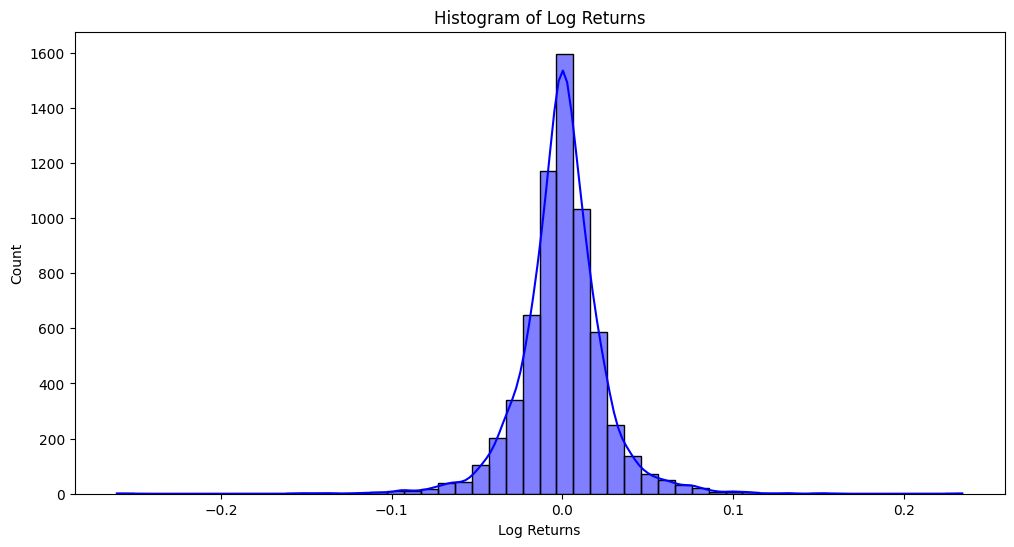

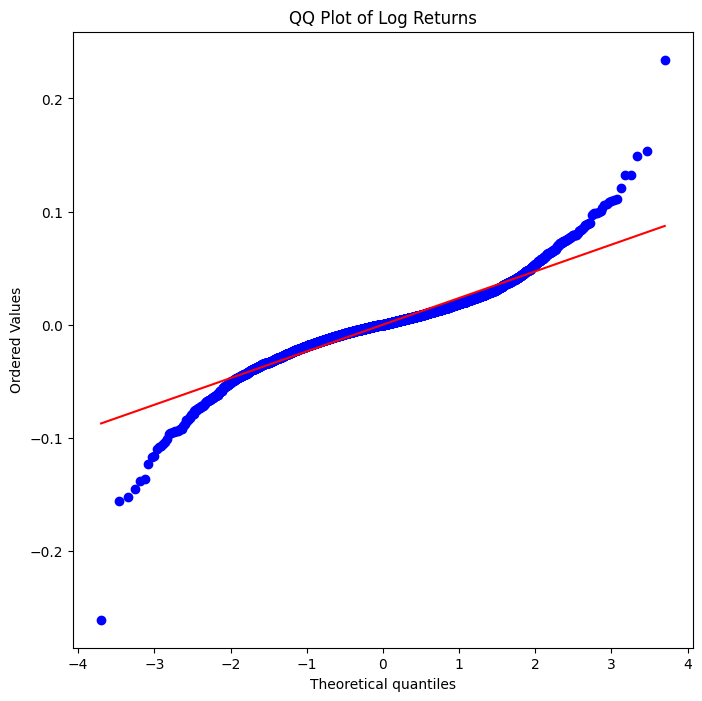

{'Jarque-Bera Statistic': 13831.489229080396,
 'Jarque-Bera p-value': 0.0,
 'Kolmogorov-Smirnov Statistic': 0.07140262490720281,
 'Kolmogorov-Smirnov p-value': 8.166934761695676e-29}

In [ ]:
import seaborn as sns
from scipy.stats import jarque_bera, kstest

# Histogram of log-returns
plt.figure(figsize=(12, 6))
sns.histplot(data['Log Returns'].dropna(), kde=True, bins=50, color='blue')
plt.title('Histogram of Log Returns')
plt.xlabel('Log Returns')
plt.show()

# QQ Plot
from scipy.stats import probplot

plt.figure(figsize=(8, 8))
probplot(data['Log Returns'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot of Log Returns')
plt.show()

# Statistical Tests
# Jarque-Bera Test
jb_stat, jb_p = jarque_bera(data['Log Returns'].dropna())

# Kolmogorov-Smirnov Test
ks_stat, ks_p = kstest(data['Log Returns'].dropna(), 'norm', args=(data['Log Returns'].mean(), data['Log Returns'].std()))

# Display results
normality_results = {
    "Jarque-Bera Statistic": jb_stat,
    "Jarque-Bera p-value": jb_p,
    "Kolmogorov-Smirnov Statistic": ks_stat,
    "Kolmogorov-Smirnov p-value": ks_p,
}
normality_results



#Step 5: Estimate Historical Volatility


In [ ]:
# Annualized volatility (252 trading days in a year)
historical_volatility = data['Log Returns'].std() * np.sqrt(252)
historical_volatility_percentage = historical_volatility * 100

historical_volatility_percentage



38.80163411870205

#Step 6: Identify Risk-Free Rate


In [ ]:
# Assigning the risk-free rate based on the provided information (3-month Treasury rate for EUR)
risk_free_rate = 0.034  # 3.4% annualized rate

risk_free_rate


0.034

#Step 7: Test the assumption if the log-returns are independent/uncorrelated.

<Figure size 1200x600 with 0 Axes>

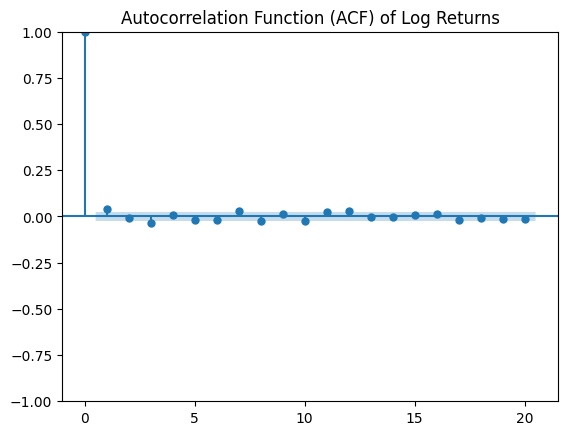

<Figure size 1200x600 with 0 Axes>

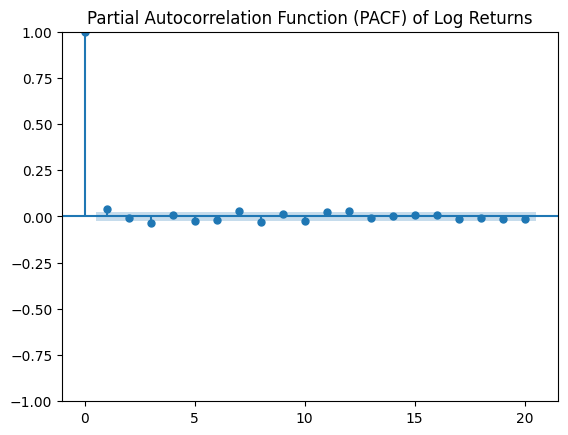

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(data['Log Returns'].dropna(), lags=20, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of Log Returns')
plt.show()

# Plot the partial autocorrelation function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(data['Log Returns'].dropna(), lags=20, alpha=0.05, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of Log Returns')
plt.show()


#Step 8. Calculate the option price for an In-The-Money (ITM) European calloption and In-The-Money European put option for the maturity November 15, 2024. The pricing date can be taken on which you calculate the option price.
#9.Use CRR and Black-Scholes Models to compute the option prices. Compare the prices from different methods.


In [ ]:
import numpy as np
from scipy.stats import norm

# Black-Scholes Model for European options
def black_scholes(S, K, T, r, sigma, option_type="call"):
    """
    Black-Scholes formula for option pricing.

    Parameters:
    - S: Current stock price
    - K: Strike price
    - T: Time to maturity (in years)
    - r: Risk-free rate
    - sigma: Volatility (annualized)
    - option_type: "call" or "put"

    Returns:
    - Option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

def crr_binomial_tree(S, K, T, r, sigma, steps, option_type="call"):
    """
    CRR Binomial Tree Model for option pricing.

    Parameters:
    - S: Current stock price
    - K: Strike price
    - T: Time to maturity (in years)
    - r: Risk-free rate
    - sigma: Volatility (annualized)
    - steps: Number of steps in the binomial tree
    - option_type: "call" or "put"

    Returns:
    - Option price
    """
    dt = T / steps  # Time per step
    u = np.exp(sigma * np.sqrt(dt))  # Up factor
    d = 1 / u  # Down factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

    # Stock price tree
    stock_tree = np.zeros((steps + 1, steps + 1))
    for i in range(steps + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S * (u ** (i - j)) * (d ** j)


    option_tree = np.zeros((steps + 1, steps + 1))
    if option_type == "call":
        option_tree[:, steps] = np.maximum(0, stock_tree[:, steps] - K)
    elif option_type == "put":
        option_tree[:, steps] = np.maximum(0, K - stock_tree[:, steps])


    for i in range(steps - 1, -1, -1):
        for j in range(i + 1):
            option_tree[j, i] = np.exp(-r * dt) * (
                p * option_tree[j, i + 1] + (1 - p) * option_tree[j + 1, i + 1]
            )

    return option_tree[0, 0]


current_price = data['Close'].iloc[-1]
strike_price_call = current_price * 0.9
strike_price_put = current_price * 1.1
maturity_date = pd.to_datetime("2024-11-22").tz_localize(None)  # Maturity date
pricing_date = pd.to_datetime(data['Date'].iloc[-1]).tz_localize(None)  # Pricing date
time_to_maturity = (maturity_date - pricing_date).days / 365.0  # Time to maturity in years
risk_free_rate = 0.034  # 3.4%
historical_volatility = 0.388  # Annualized historical volatility (38.8%)
steps = 100  # Number of steps for CRR model

# Correct maturity if T < 0
if time_to_maturity < 0:
    maturity_date = pricing_date + pd.DateOffset(years=1)
    time_to_maturity = (maturity_date - pricing_date).days / 365.0

# Black-Scholes Prices
call_price_bs = black_scholes(current_price, strike_price_call, time_to_maturity, risk_free_rate, historical_volatility, "call")
put_price_bs = black_scholes(current_price, strike_price_put, time_to_maturity, risk_free_rate, historical_volatility, "put")

# CRR Binomial Prices
call_price_crr = crr_binomial_tree(current_price, strike_price_call, time_to_maturity, risk_free_rate, historical_volatility, steps, "call")
put_price_crr = crr_binomial_tree(current_price, strike_price_put, time_to_maturity, risk_free_rate, historical_volatility, steps, "put")

# Display the results
{
    "Black-Scholes Call Price": call_price_bs,
    "Black-Scholes Put Price": put_price_bs,
    "CRR Call Price": call_price_crr,
    "CRR Put Price": put_price_crr
}


{'Black-Scholes Call Price': 15.3678727201563,
 'Black-Scholes Put Price': 15.339268309048606,
 'CRR Call Price': 15.36787269010809,
 'CRR Put Price': 15.33926799454924}

In [ ]:
!pip install arch


#Step-10

In [ ]:
from arch import arch_model

# GARCH(1,1) Model
log_returns = data['Log Returns'].dropna() * 100  # Scale log returns to percentages for GARCH
garch_model = arch_model(log_returns, vol="Garch", p=1, q=1, mean="Zero", dist="normal")
garch_result = garch_model.fit(disp="off")

# Extract GARCH Annualized Volatility
garch_volatility = garch_result.conditional_volatility.mean() * np.sqrt(252) / 100  # Convert to decimal

print(f"GARCH Volatility (Annualized): {garch_volatility:.4f}")

# Black-Scholes with GARCH Volatility
call_price_garch = black_scholes(current_price, strike_price_call, time_to_maturity, risk_free_rate, garch_volatility, option_type="call")
put_price_garch = black_scholes(current_price, strike_price_put, time_to_maturity, risk_free_rate, garch_volatility, option_type="put")

# CRR with GARCH Volatility
call_price_crr_garch = crr_binomial_tree(current_price, strike_price_call, time_to_maturity, risk_free_rate, garch_volatility, steps, "call")
put_price_crr_garch = crr_binomial_tree(current_price, strike_price_put, time_to_maturity, risk_free_rate, garch_volatility, steps, "put")

# Display Option Prices
print(f"\nOption Prices Using GARCH Volatility:")
print(f"Black-Scholes Call Price (GARCH Volatility): {call_price_garch:.2f}")
print(f"Black-Scholes Put Price (GARCH Volatility): {put_price_garch:.2f}")
print(f"CRR Call Price (GARCH Volatility): {call_price_crr_garch:.2f}")
print(f"CRR Put Price (GARCH Volatility): {put_price_crr_garch:.2f}")

# Comparison of Option Prices
print("\nComparison of Option Prices:")
print(f"Black-Scholes Call: {call_price_bs:.2f}, CRR Call: {call_price_crr:.2f}, Black-Scholes Call (GARCH): {call_price_garch:.2f}")
print(f"Black-Scholes Put: {put_price_bs:.2f}, CRR Put: {put_price_crr:.2f}, Black-Scholes Put (GARCH): {put_price_garch:.2f}")



GARCH Volatility (Annualized): 0.3572

Option Prices Using GARCH Volatility:
Black-Scholes Call Price (GARCH Volatility): 15.37
Black-Scholes Put Price (GARCH Volatility): 15.34
CRR Call Price (GARCH Volatility): 15.37
CRR Put Price (GARCH Volatility): 15.34

Comparison of Option Prices:
Black-Scholes Call: 15.37, CRR Call: 15.37, Black-Scholes Call (GARCH): 15.37
Black-Scholes Put: 15.34, CRR Put: 15.34, Black-Scholes Put (GARCH): 15.34


In [ ]:
print("\nComparison of Option Prices:")
print(f"Black-Scholes Call: {call_price_bs:.2f}, CRR Call: {call_price_crr:.2f}, Black-Scholes Call (GARCH): {call_price_garch:.2f}")
print(f"Black-Scholes Put: {put_price_bs:.2f}, CRR Put: {put_price_crr:.2f}, Black-Scholes Put (GARCH): {put_price_garch:.2f}")



Comparison of Option Prices:
Black-Scholes Call: 15.37, CRR Call: 15.37, Black-Scholes Call (GARCH): 15.37
Black-Scholes Put: 15.34, CRR Put: 15.34, Black-Scholes Put (GARCH): 15.34
